#### Problem statement.

Build a recommender system by using cosine simillarties score.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("book.csv")

In [3]:
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
data.shape

(10000, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
data.isnull().sum()


Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [8]:
data1 = data.sort_values('User.ID')

In [9]:
data1

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2401,2402,8,Wings,5
2400,2401,8,The Western way: A practical guide to the West...,5
2399,2400,8,Ancient Celtic Romances,5
2402,2403,8,Truckers,5
2405,2406,8,The Art Of Celtia,7
...,...,...,...,...
2395,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,2399,278854,Celtic Mythology (Library of the World's Myths...,8
2393,2394,278854,A corrente de Trewis Scott,7
2394,2395,278854,As valkÃ­rias,7


In [10]:
data2 = data1.rename(columns={'User.ID':'UI','Book.Title':'BK','Book.Rating':'Rating'})

In [11]:
data2

,Unnamed: 0,UI,BK,Rating
2401,2402,8,Wings,5
2400,2401,8,The Western way: A practical guide to the West...,5
2399,2400,8,Ancient Celtic Romances,5
2402,2403,8,Truckers,5
2405,2406,8,The Art Of Celtia,7
...,...,...,...,...
2395,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,2399,278854,Celtic Mythology (Library of the World's Myths...,8
2393,2394,278854,A corrente de Trewis Scott,7
2394,2395,278854,As valkÃ­rias,7


In [12]:
data2

,Unnamed: 0,UI,BK,Rating
2401,2402,8,Wings,5
2400,2401,8,The Western way: A practical guide to the West...,5
2399,2400,8,Ancient Celtic Romances,5
2402,2403,8,Truckers,5
2405,2406,8,The Art Of Celtia,7
...,...,...,...,...
2395,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,2399,278854,Celtic Mythology (Library of the World's Myths...,8
2393,2394,278854,A corrente de Trewis Scott,7
2394,2395,278854,As valkÃ­rias,7


In [13]:
#Number of unique users in the data set
len(data2.UI.unique())

2182

In [14]:
data2['Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

<AxesSubplot:>

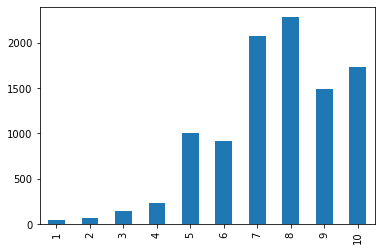

In [15]:
data2['Rating'].value_counts().sort_index().plot(kind='bar')

In [16]:
len(data2.BK.unique())

9659

In [17]:
data2['BK'].value_counts()

Fahrenheit 451                                    5
The Subtle Knife (His Dark Materials, Book 2)     4
Stardust                                          4
Charlie and the Chocolate Factory                 4
Ender's Game (Ender Wiggins Saga (Paperback))     4
                                                 ..
The Littles to the Rescue (Littles)               1
When I Grow Up (Little Look-Look)                 1
The Crying Child                                  1
SABLE MOON                                        1
A Treasury of Irish Myth, Legend, and Folklore    1
Name: BK, Length: 9659, dtype: int64

<AxesSubplot:>

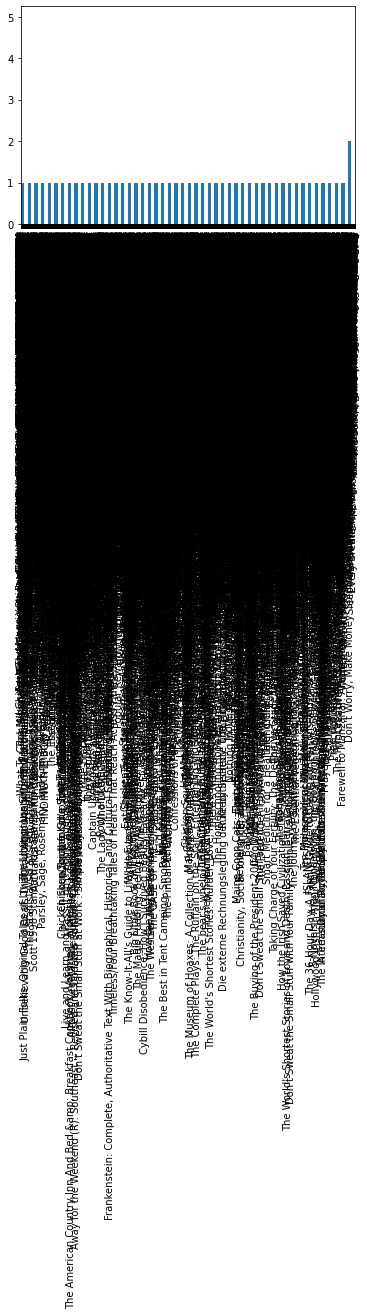

In [18]:
data2['BK'].value_counts(ascending=True).plot(kind='bar')

In [19]:
data2['UI'].value_counts().sort_index()

8          7
9          1
10         1
12         1
14         3
          ..
278846     1
278849     1
278851    14
278852     1
278854     6
Name: UI, Length: 2182, dtype: int64

In [20]:
data3 = data2.pivot_table(index='UI',
                   columns='BK',
                   values='Rating').reset_index(drop=True)


In [64]:
data3.fillna(0,inplace=True)

In [65]:
data3

BK,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Impute(replace) those Null with 0 values


data3.fillna(0, inplace=True)


In [23]:
data3

BK,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Calculating Cosine similarities between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [25]:
user_sim = 1-pairwise_distances(data3.values,metric='cosine')

In [26]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:
#Store the result in dataframe
user_sim_df = pd.DataFrame(user_sim)

In [70]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
#set the index and column names to user ids
user_sim_df.index = data2.UI.unique()
user_sim_df.columns = data2.UI.unique()

In [73]:
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
np.fill_diagonal(user_sim,0)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Most similar Users
user_sim_df.idxmax(axis=1)
print(user_sim_df.max(axis=1).sort_values(ascending=False).head(50))


1100    1.000000
427     1.000000
1545    1.000000
2001    1.000000
561     1.000000
657     1.000000
1722    1.000000
1985    1.000000
1625    1.000000
1976    1.000000
1970    1.000000
1528    1.000000
180     1.000000
179     1.000000
1235    1.000000
253     1.000000
359     1.000000
721     1.000000
1596    1.000000
1101    1.000000
1426    1.000000
364     0.752577
1573    0.707107
28      0.707107
2134    0.668965
1578    0.668965
1708    0.662266
2010    0.662266
1997    0.613941
1939    0.613941
994     0.549972
1813    0.549972
1804    0.515325
1814    0.515325
1584    0.502571
1705    0.502571
2125    0.500000
1914    0.498464
565     0.498464
137     0.495904
1072    0.495904
1938    0.476290
1561    0.476290
705     0.463241
1187    0.463241
1124    0.453638
1180    0.453638
323     0.437426
1828    0.437426
1489    0.384900
dtype: float64


In [30]:
user_sim_df.idxmax(axis=1)[0:15]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7     2059
8        0
9        0
10       0
11       0
12       0
13       0
14    1031
dtype: int64

In [31]:
'''
1 represents that the two user ID have read the same books

'''

'\n1 represents that the two user ID have read the same books\n\n'

In [32]:
data2[(data2['UI']==22) | (data2['UI']==8)]

,Unnamed: 0,UI,BK,Rating
2401,2402,8,Wings,5
2400,2401,8,The Western way: A practical guide to the West...,5
2399,2400,8,Ancient Celtic Romances,5
2402,2403,8,Truckers,5
2405,2406,8,The Art Of Celtia,7
2403,2404,8,Keepers of the Earth Teachers Guide,6
2404,2405,8,The Celts Activity Book,6
2418,2419,22,Shock-Trauma,7


In [33]:
reader1=data2[(data2['UI']==22)] 
reader1


,Unnamed: 0,UI,BK,Rating
2418,2419,22,Shock-Trauma,7


In [34]:
reader2=data2[(data2['UI']==8)] 
reader2


,Unnamed: 0,UI,BK,Rating
2401,2402,8,Wings,5
2400,2401,8,The Western way: A practical guide to the West...,5
2399,2400,8,Ancient Celtic Romances,5
2402,2403,8,Truckers,5
2405,2406,8,The Art Of Celtia,7
2403,2404,8,Keepers of the Earth Teachers Guide,6
2404,2405,8,The Celts Activity Book,6


In [35]:
type(reader1)

pandas.core.frame.DataFrame

In [36]:
type(reader2)

pandas.core.frame.DataFrame

In [37]:
reader1.BK

2418    Shock-Trauma
Name: BK, dtype: object

In [38]:
reader2.BK

2401                                                Wings
2400    The Western way: A practical guide to the West...
2399                              Ancient Celtic Romances
2402                                             Truckers
2405                                    The Art Of Celtia
2403                  Keepers of the Earth Teachers Guide
2404                              The Celts Activity Book
Name: BK, dtype: object

In [39]:
pd.merge(reader1,reader2,on='BK',how='outer')

,Unnamed: 0_x,UI_x,BK,Rating_x,Unnamed: 0_y,UI_y,Rating_y
0,2419.0,22.0,Shock-Trauma,7.0,NaN,NaN,NaN
1,NaN,NaN,Wings,NaN,2402.0,8.0,5.0
2,NaN,NaN,The Western way: A practical guide to the West...,NaN,2401.0,8.0,5.0
3,NaN,NaN,Ancient Celtic Romances,NaN,2400.0,8.0,5.0
4,NaN,NaN,Truckers,NaN,2403.0,8.0,5.0
5,NaN,NaN,The Art Of Celtia,NaN,2406.0,8.0,7.0
6,NaN,NaN,Keepers of the Earth Teachers Guide,NaN,2404.0,8.0,6.0
7,NaN,NaN,The Celts Activity Book,NaN,2405.0,8.0,6.0
